In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
pd.set_option('display.max_columns', None)
card = pd.read_csv(r'Downloads/creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
card.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239

In [6]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
card.shape

(284807, 31)

In [8]:
round(100 * (card.isnull().sum()/len(card)), 2).sort_values(ascending = False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

In [9]:
card_d = card.copy()
card_d.drop_duplicates(subset = None, inplace = True)

In [10]:
card.shape

(284807, 31)

In [11]:
card_d.shape

(283726, 31)

In [12]:
card = card_d
card.shape

(283726, 31)

In [13]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
Time      283726 non-null float64
V1        283726 non-null float64
V2        283726 non-null float64
V3        283726 non-null float64
V4        283726 non-null float64
V5        283726 non-null float64
V6        283726 non-null float64
V7        283726 non-null float64
V8        283726 non-null float64
V9        283726 non-null float64
V10       283726 non-null float64
V11       283726 non-null float64
V12       283726 non-null float64
V13       283726 non-null float64
V14       283726 non-null float64
V15       283726 non-null float64
V16       283726 non-null float64
V17       283726 non-null float64
V18       283726 non-null float64
V19       283726 non-null float64
V20       283726 non-null float64
V21       283726 non-null float64
V22       283726 non-null float64
V23       283726 non-null float64
V24       283726 non-null float64
V25       283726 non-null float64
V26  

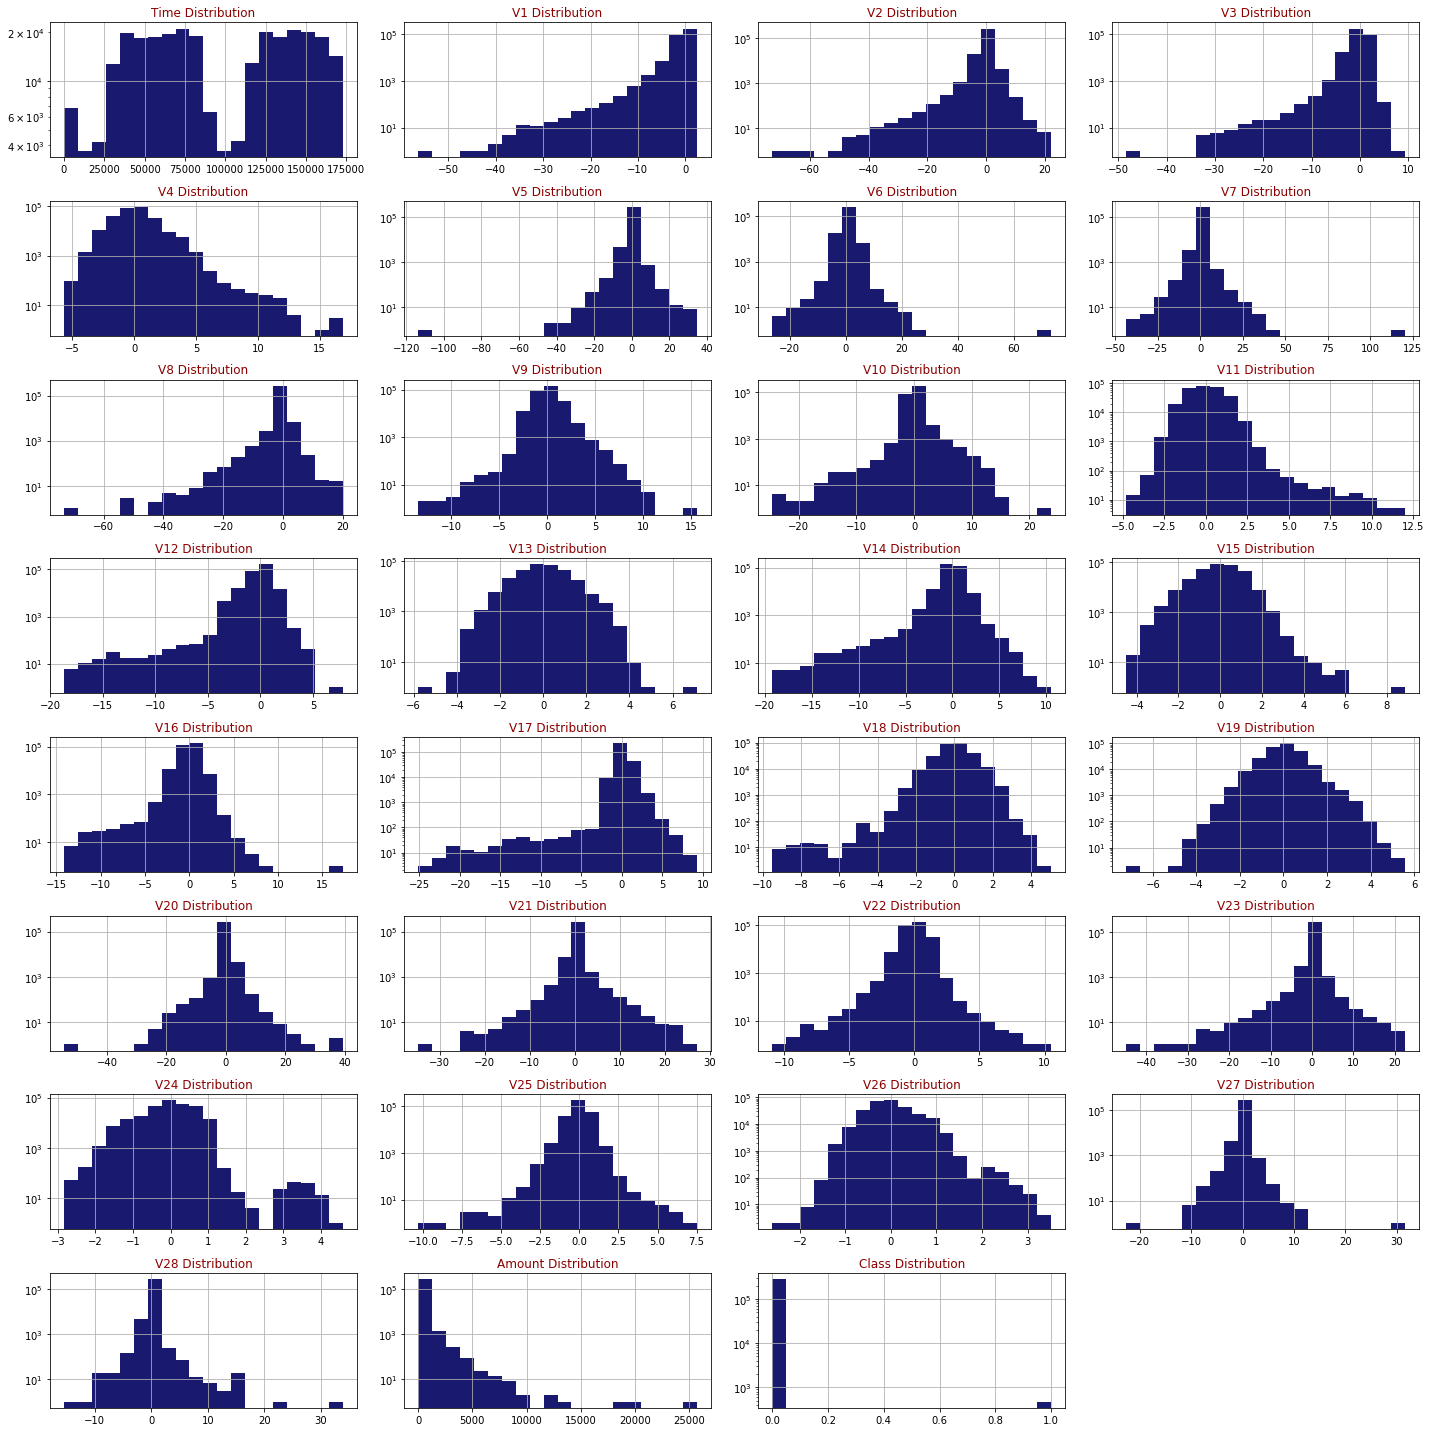

In [15]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(card,card.columns,8,4)

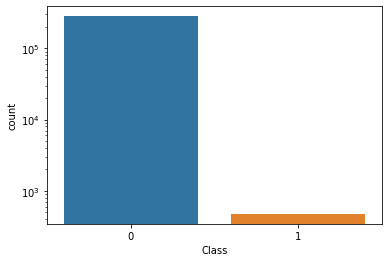

In [19]:
ax = sns.countplot(x = 'Class', data = card)
ax.set_yscale('log')

In [20]:
card.shape

(283726, 31)

In [21]:
card.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239

In [24]:
estimators = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X1 = card[estimators]
y = card['Class']

In [25]:
col = X1.columns[:-1]
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [27]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y, X)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003922
         Iterations 13


In [28]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283695
Method:                           MLE   Df Model:                           30
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:                  0.6819
Time:                        15:42:12   Log-Likelihood:                -1112.8
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3983      0.250    -33.602      0.000      -8.888      -7.908
Time       -3.676e-06   2.26e-06     -1.627      0.104    -8.1e-06    7.51e-07
V1             0.0961      0.042      2.270      0.023       0.013       0.179
V2             0.0106      0.058      0.182      0.855      -0.103       0.125
V3            -0.0083      0.053     -0.157      0.875      -0.112       0.096
V4             0.7013      0.074      9.484      0.000       0.556       0.846
V5             0.1305      0.067      1.952      0.051      -0.001       0.262
V6            -0.1240      0.074     -1.671      0.095      -0.269       0.021
V7            -0.0948      0.067     -1.421      0.155      -0.226       0.036
V8            -0.1766      0.031     -5.769      0.000      -0.237      -0.117
V9            -0.2825      0.111     -2.551      0.011      -0.500      -0.065
V10           -0.8230      0.097     -8.497      0.000      -1.013      -0.633
V11           -0.0579      0.081     -0.711      0.477      -0.217       0.102
V12            0.0831      0.087      0.955      0.339      -0.087       0.254
V13           -0.3257      0.082     -3.986      0.000      -0.486      -0.166
V14           -0.5477      0.062     -8.785      0.000      -0.670      -0.426
V15           -0.1207      0.086     -1.403      0.161      -0.289       0.048
V16           -0.1992      0.125     -1.592      0.111      -0.444       0.046
V17           -0.0139      0.070     -0.198      0.843      -0.151       0.124
V18           -0.0139      0.129     -0.107      0.914      -0.267       0.239
V19            0.0985      0.097      1.015      0.310      -0.092       0.289
V20           -0.4616      0.082     -5.660      0.000      -0.621      -0.302
V21            0.3944      0.060      6.564      0.000       0.277       0.512
V22            0.6377      0.134      4.750      0.000       0.375       0.901
V23           -0.1021      0.059     -1.733      0.083      -0.217       0.013
V24            0.1191      0.148      0.807      0.420      -0.170       0.409
V25           -0.0506      0.133     -0.379      0.704      -0.312       0.211
V26            0.0094      0.190      0.050      0.960      -0.363       0.382
V27           -0.8265      0.122     -6.778      0.000      -1.065      -0.587
V28           -0.2973      0.088     -3.378      0.001      -0.470      -0.125
Amount         0.0009      0.000      2.454      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [32]:
def back_feature_elem(data_frame, dep_var, col_list):
    while len(col_list) > 0:
        model = sm.Logit(dep_var, data_frame[col_list])
        result = model.fit(disp = 0)
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
            
result = back_feature_elem(X, card.Class, col)            

In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283701
Method:                           MLE   Df Model:                           24
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:                 0.03183
Time:                        15:57:33   Log-Likelihood:                -3386.9
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                 3.947e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time          -0.0001   1.43e-06    -85.924      0.000      -0.000      -0.000
V1             0.8891      0.028     31.770      0.000       0.834       0.944
V2            -0.4504      0.023    -19.221      0.000      -0.496      -0.405
V3            -1.6025      0.032    -49.412      0.000      -1.666      -1.539
V4             0.1457      0.026      5.709      0.000       0.096       0.196
V5             0.4091      0.024     17.030      0.000       0.362       0.456
V6            -0.3883      0.025    -15.228      0.000      -0.438      -0.338
V7             0.0986      0.028      3.529      0.000       0.044       0.153
V8            -0.3896      0.023    -17.071      0.000      -0.434      -0.345
V9            -0.4603      0.043    -10.647      0.000      -0.545      -0.376
V10           -0.3865      0.051     -7.513      0.000      -0.487      -0.286
V11           -0.6094      0.034    -17.849      0.000      -0.676      -0.542
V12            0.1223      0.034      3.563      0.000       0.055       0.190
V13           -0.4500      0.035    -13.042      0.000      -0.518      -0.382
V14           -0.6893      0.032    -21.761      0.000      -0.751      -0.627
V15           -1.0460      0.041    -25.257      0.000      -1.127      -0.965
V16           -0.2471      0.042     -5.925      0.000      -0.329      -0.165
V17           -0.7008      0.033    -21.372      0.000      -0.765      -0.637
V20           -0.6800      0.050    -13.632      0.000      -0.778      -0.582
V21            0.5744      0.041     13.900      0.000       0.493       0.655
V22            1.3583      0.062     21.848      0.000       1.236       1.480
V23            0.2907      0.055      5.294      0.000       0.183       0.398
V25           -1.9920      0.073    -27.453      0.000      -2.134      -1.850
V26            0.3016      0.072      4.194      0.000       0.161       0.443
V27           -0.7760      0.090     -8.607      0.000      -0.953      -0.599
==============================================================================

Possibly complete quasi-separation: A fraction 0.68 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
p_value = round(result.pvalues, 3)
conf['pvalue'] = p_value
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print ((conf))

      CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
Time      0.999874       0.999880    0.999877     0.0
V1        2.302981       2.569980    2.432820     0.0
V2        0.608731       0.667302    0.637344     0.0
V3        0.188994       0.214614    0.201397     0.0
V4        1.100385       1.216133    1.156812     0.0
V5        1.436263       1.578095    1.505510     0.0
V6        0.645176       0.712990    0.678236     0.0
V7        1.044815       1.165779    1.103641     0.0
V8        0.647697       0.708313    0.677327     0.0
V9        0.579802       0.686889    0.631078     0.0
V10       0.614250       0.751502    0.679419     0.0
V11       0.508500       0.581317    0.543691     0.0
V12       1.056575       1.208747    1.130103     0.0
V13       0.595904       0.682214    0.637600     0.0
V14       0.471735       0.534095    0.501947     0.0
V15       0.323961       0.381060    0.351353     0.0
V16       0.719768       0.847593    0.781070     0.0
V17       0.465302       0.5

In [42]:
new_features = card[['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20','V21', 'V22', 'V23', 'V25', 'V26', 'V27', 'Class']]
x = new_features.iloc[:, :-1]
y = new_features.iloc[:, -1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 5, stratify = y)

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

c:\users\abhiyogan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9989602791386177

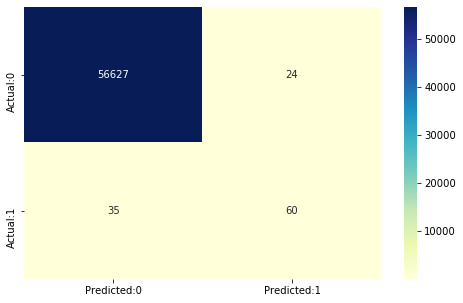

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [49]:
true_neg = cm[0,0]
true_pos = cm[1,1]
false_neg = cm[1,0]
false_pos = cm[0,1]
sensitivity = true_pos/float(true_pos + false_neg)
specificity = true_neg/float(true_neg + false_pos)

In [51]:
print('The accuracy of the model = ',(true_pos + true_neg)/float(true_pos + true_neg + false_pos + false_neg),'\n',

'The Miss classification = ',1-((true_pos+true_neg)/float(true_pos + true_neg + false_pos + false_neg)),'\n',

'Sensitivity or True Positive Rate = ',true_pos/float(true_pos + false_neg),'\n',

'Specificity or True Negative Rate = ',true_neg/float(true_neg + false_pos),'\n',

'Positive Predictive value = ',true_pos/float(true_pos + false_pos),'\n',

'Negative predictive Value = ',true_neg/float(true_neg + false_neg),'\n',

'Positive Likelihood Ratio = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = ',(1-sensitivity)/specificity)

The accuracy of the model =  0.9989602791386177 
 The Miss classification =  0.001039720861382265 
 Sensitivity or True Positive Rate =  0.631578947368421 
 Specificity or True Negative Rate =  0.9995763534624279 
 Positive Predictive value =  0.7142857142857143 
 Negative predictive Value =  0.9993823020719353 
 Positive Likelihood Ratio =  1490.8157894738763 
 Negative likelihood Ratio =  0.3685771990857997


In [52]:
y_pred_prob = log_reg.predict_proba(x_test)[:,:]
y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns = ['probabilty of not fraud (0)', 'probabilty of fraud (1)'])
y_pred_prob_df.head()

,probabilty of not fraud (0),probabilty of fraud (1)
0,0.999823,0.000177
1,0.999532,0.000468
2,0.999766,0.000234
3,0.999632,0.000368
4,0.999980,0.000020


In [54]:
from sklearn.preprocessing import binarize
for i in range(0,11):
    cm2=0
    y_pred_prob_yes=log_reg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.0 threshold the Confusion Matrix is  
 [[    0 56651]
 [    0    95]] 
 with 95 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.1 threshold the Confusion Matrix is  
 [[56237   414]
 [   29    66]] 
 with 56303 correct predictions and 29 Type II errors( False Negatives) 

 Sensitivity:  0.6947368421052632 Specificity:  0.9926920972268803 



With 0.2 threshold the Confusion Matrix is  
 [[56518   133]
 [   30    65]] 
 with 56583 correct predictions and 30 Type II errors( False Negatives) 

 Sensitivity:  0.6842105263157895 Specificity:  0.9976522921042876 



With 0.3 threshold the Confusion Matrix is  
 [[56595    56]
 [   32    63]] 
 with 56658 correct predictions and 32 Type II errors( False Negatives) 

 Sensitivity:  0.6631578947368421 Specificity:  0.9990114914123317 



With 0.4 threshold the Confusion Matrix is  
 [[56621    30]
 [   34    61]] 
 with 56682 correct predictions and 34 Type II errors( False Neg

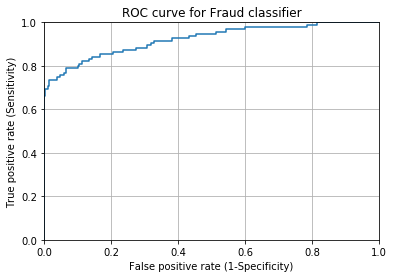

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob_yes[:, 1])

0.9231620382972754